# Predictin Car Prices with K-Nearest Neighbor

In this we will practice waht we learned about machine learning and the K-nearest neighbord model.

In [65]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [66]:
#Importing the data and naming the columns
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols, na_values='?')
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [67]:
#Identifying columns that can be used as features
number_cols = ['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke','compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
cars[number_cols].dtypes

symboling             int64
wheel_base          float64
length              float64
width               float64
height              float64
curb_weight           int64
engine_size           int64
bore                float64
stroke              float64
compression_rate    float64
horsepower          float64
peak_rpm            float64
city_mpg              int64
highway_mpg           int64
dtype: object

In [68]:
#identifying columns with nulls
cars['normalized_losses'].isnull().sum()

41

normalized_losses column has a more that 30% of its values as nulls so I decided to eliminate the entire column

In [69]:
cars = cars.copy().drop('normalized_losses', axis = 1)

In [70]:
cars[number_cols].isnull().sum()

symboling           0
wheel_base          0
length              0
width               0
height              0
curb_weight         0
engine_size         0
bore                4
stroke              4
compression_rate    0
horsepower          2
peak_rpm            2
city_mpg            0
highway_mpg         0
dtype: int64

In [71]:
#let's explore the rows whit null values to check if we can approximate this values
cars[cars['bore'].isnull()]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [72]:
cars[(cars['make']=='mazda') & (cars['fuel_type']=='gas') & (cars['num_of_doors']=='two')]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195.0
51,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0
52,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
59,1,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845.0
61,1,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0


In [73]:
#let's drop the rows with null values, at the they are just six
cars = cars.copy().dropna()
cars[number_cols].isnull().sum()

symboling           0
wheel_base          0
length              0
width               0
height              0
curb_weight         0
engine_size         0
bore                0
stroke              0
compression_rate    0
horsepower          0
peak_rpm            0
city_mpg            0
highway_mpg         0
dtype: int64

In [74]:
#Normalizing the columns
numeric_cars = cars[number_cols]
normalized_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = cars['price']
normalized_cars.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [75]:
#Creating a function to practice our model with diferents unique features
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training, target, df):
    X_train, X_test, y_train, y_test = train_test_split(df[[training]], df[target], test_size=0.3)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    return mean_squared_error(y_test, predicted)**(1/2)    

In [76]:
#Testing
knn_train_test('engine_size', 'price', normalized_cars)

3315.8720387314975

The column that best perform with the model was engine_size.
Lets modify the logic so for each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9) and visualize the results using a scatter plot or a line plot.

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test_2(training, target, df):
    k_values = [1, 3, 5, 7, 9]
    rmse_values = []
    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(df[[training]], df[target], test_size=0.3)
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        rmse_values.append(mean_squared_error(y_test, predicted)**(1/2))
    plt.scatter(k_values, rmse_values)
    plt.show()

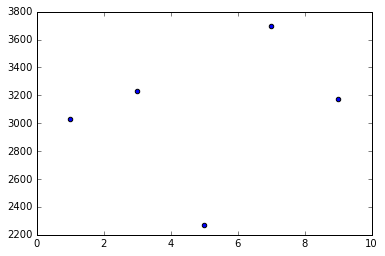

In [78]:
#Testing
knn_train_test_2('engine_size', 'price', normalized_cars)

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns

In [79]:
def knn_train_test_multiple(training, target, df):
    k_values = [i for i in range(1, 25)]
    rmse_values = []
    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(df[training], df[target], test_size=0.3)
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        rmse_values.append(mean_squared_error(y_test, predicted)**(1/2))
    plt.scatter(k_values, rmse_values)
    plt.show()

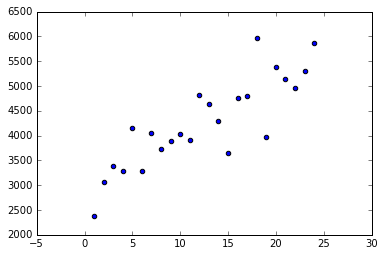

In [80]:
knn_train_test_multiple(['engine_size', 'compression_rate'], 'price', normalized_cars)

Let's modify the previous model and use k-fold

In [81]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test_multiple_kfolds(training, target, df):
    k_values = [i for i in range(1, 25)]    
    rmse_values = []
    for k in k_values:
        kf = KFold(5, shuffle=True)
        knn = KNeighborsRegressor(n_neighbors=k)
        rmse = cross_val_score(knn, df[training], df[target], scoring='neg_mean_squared_error', cv=kf)
        avg_rmse = np.mean(abs(rmse)**(1/2))
        rmse_values.append(avg_rmse)
    plt.scatter(k_values, rmse_values)
    plt.show()
    print(rmse_values, avg_rmse)

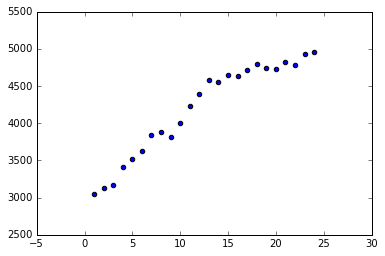

[3049.5218089245927, 3131.921117290649, 3170.39051903197, 3417.8618679906162, 3520.2226762589553, 3629.3496613353173, 3835.319457911372, 3884.9926568326446, 3808.6596879509207, 3997.233955113124, 4236.641755553188, 4398.203260455196, 4576.087626367539, 4547.550303422033, 4643.339376317524, 4632.573209063291, 4715.330106510761, 4790.888362809202, 4735.830766670215, 4734.636813196183, 4823.436661023779, 4787.71240268552, 4925.813865432237, 4956.520666568287] 4956.520666568287


In [82]:
knn_train_test_multiple_kfolds(['engine_size', 'compression_rate'], 'price', normalized_cars)